# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
trip_map = {"RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,}
df["trip_type"] = df["trip_type"].map(trip_map)

In [ ]:
print(df['trip_type'])

0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: trip_type, Length: 50000, dtype: int64


In [ ]:
channel_map = {"Mobile": 1,
    "Internet": 2}
df["sales_channel"] = df["sales_channel"].map(channel_map)

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df['booking_origin'].value_counts()

In [ ]:
df.info()

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

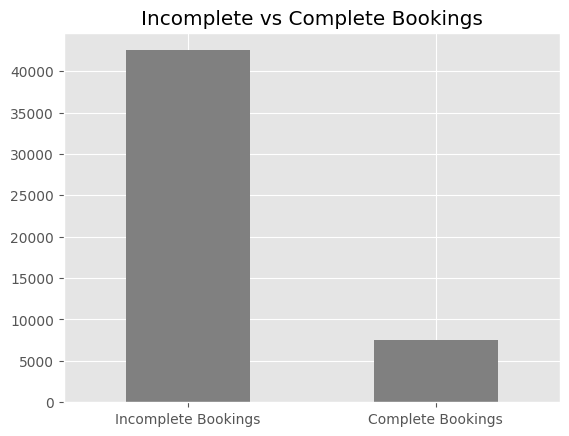

In [ ]:
dmap = {0: 'Incomplete Bookings', 1: 'Complete Bookings'}
(df['booking_complete'].value_counts().rename(dmap)
     .plot.bar(title='Incomplete vs Complete Bookings', rot=0, color='grey'))
plt.show()

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
df.isna().sum()

In [ ]:
df_corr=df.corr()
df_corr

<ipython-input-32-fe1f1278251a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.002398,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
trip_type,-0.002398,1.000000,0.007691,-0.011779,0.003194,0.010716,-0.007786,-0.014732,0.043418,-0.027215
purchase_lead,0.212606,0.007691,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.011779,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.003194,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,0.010716,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.007786,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.014732,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.043418,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.027215,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


<Axes: >

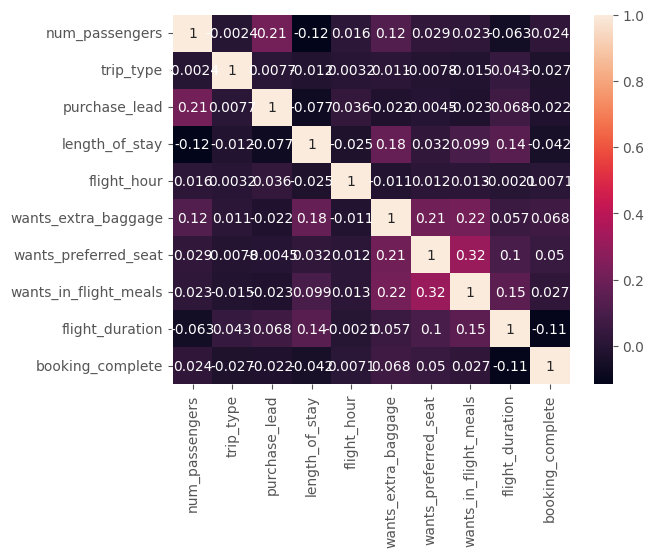

In [ ]:
sns.heatmap(df_corr, annot=True)

In [ ]:
df[['booking_origin','booking_complete']].query('booking_complete==0').groupby('booking_origin') \
  .agg(['count']).plot()


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X = df.drop('booking_complete',axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X[['num_passengers',	'trip_type',	'purchase_lead',	'length_of_stay',	'flight_hour',	'wants_extra_baggage',	'wants_preferred_seat',	'wants_in_flight_meals','flight_duration']], y,stratify=y, test_size=0.2, random_state=0)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Accuracy = ",model.score(X_test,y_test))
y_predicted = model.predict(X_test)
confusion_matrix(y_test, y_predicted)

Accuracy =  0.7592


array([[7248, 1256],
       [1152,  344]])